### Statistical Inference: Bootstrap Confidence Interval

This notebook demostrates how to construct confidence interval of a statistic using the bootstrap method. We will also examine the coverage probability of CI.

- Construct Bootstrap Confidence Interval
- Check the coverage probability
- Bootstrap CI for correlation coefficient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate some random data
data = np.random.randn(100)*10 + 20

data

array([34.70890112, 16.0039299 , 11.57058643, 26.34173755, 21.8889109 ,
       29.21628919, 38.58664286, 13.09860582, 16.32128487, 17.76339625,
       16.63251066, 13.86942519, 23.27189214,  3.80830187,  8.70477321,
       34.02671471, 20.17769776, 23.14630536, 16.14255265,  4.49961821,
       11.21447575,  9.26541136, 26.10482085, 14.3116868 , 20.36325505,
       17.0617248 ,  9.1011571 , 37.15774513, 10.60375509, 14.04671377,
       16.434599  , 21.87696751, 10.08654252, -0.796366  , 20.10543813,
        6.42187015, 37.78398136, 15.28662573, 39.59350947, 25.61120726,
       17.31851672, 30.68108547, 28.37672879, 12.41383935,  9.97752466,
       28.16808936, 24.12376543, 14.36243251, 15.27902212,  2.14753361,
       12.28013986,  7.90904537, 28.93008456, 31.28683002, 13.46005182,
       20.03425335, 19.50098245, 25.64174982, 14.23728721, -5.50205403,
       27.51128515, 25.62920355, 24.28122164, 28.60774557, 21.46501861,
       25.33800639, 40.85666673, 30.90959856, 19.80867915, 36.86

(array([ 3.,  4., 11., 25., 20., 19., 10.,  8.]),
 array([-5.50205403,  0.29278607,  6.08762616, 11.88246626, 17.67730635,
        23.47214645, 29.26698654, 35.06182664, 40.85666673]),
 <BarContainer object of 8 artists>)

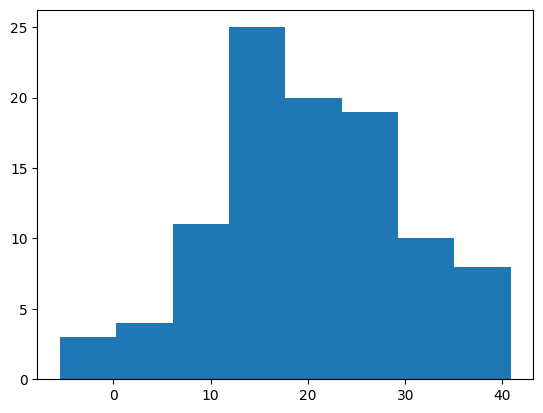

In [3]:
plt.hist(data,bins=8)

In [4]:
print("Population mean is:", np.mean(data))

print("Population variance is:", np.var(data))

Population mean is: 20.194709508728884
Population variance is: 96.6056531743464


In [5]:
#One sample with 30 numbers, this is what we have in hand.

sample_30 = np.random.choice(data, 30, replace=True)

sample_30

array([12.70863328, 17.94485675, 30.34266412,  2.14753361, 21.46501861,
       31.28683002, 14.86876168, 11.21447575, 15.72541066, 20.17769776,
       26.10482085,  2.7473372 , 25.33800639,  8.70477321, 31.62702043,
       12.70863328, 29.21628919, 17.76339625, 37.78398136, 25.33800639,
       14.58102161, 21.8889109 , 14.3116868 ,  2.7473372 , 27.81106122,
       36.86165675, 31.62702043, 14.3116868 ,  8.37844713,  9.26541136])

1. Construct Bootstrap CI

In [6]:
#Define a bootstrap function:
def bootstrap(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Calculatet the mean and std of the bootstrap sampling distribution
    bootstrap_mean = np.mean(bootstrap_mean_list)
    boostrap_std = np.std(bootstrap_mean_list)
    
    # mean +- 2*std for an approximate 95% CI.
    CI = [(bootstrap_mean - 2*boostrap_std), (bootstrap_mean + 2*boostrap_std)]
    
    return CI
    

In [7]:
#Do the same thing for the percentile-based method:
def bootstrap_perc(sample):
    
    bootstrap_mean_list = []
    
    for i in range(1000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_mean_list, 2.5), 
          np.percentile(bootstrap_mean_list, 97.5)]
    
    return percentile_CI
    

In [8]:
bootstrap_CI = bootstrap(sample_30)
bootstrap_CI_perc = bootstrap_perc(sample_30)

In [9]:
print("95% bootstrap CI: ", bootstrap_CI)
print("95% percentile-based bootstrap CI: ", bootstrap_CI_perc)

95% bootstrap CI:  [15.638114978105367, 22.885731662815108]
95% percentile-based bootstrap CI:  [15.451153673647907, 22.908528591622908]


2. Testing the coverage of the 95% CI

In [10]:
%%time
#generate samples for multiple times
counter = 0
counter_perc = 0
true_mean = np.mean(data)

for i in range(1000):
    #generate a sample with 30 numbers
    sample = np.random.choice(data, 30, replace=True)
    
    #For each sample, we compute the two CIs:
    ci = bootstrap(sample)
    perc_ci = bootstrap_perc(sample)
    
    #Check the coverage
    if ci[0] <= true_mean <= ci[1]:
        counter = counter + 1
        
    if perc_ci[0] <= true_mean <= perc_ci[1]:
        counter_perc = counter_perc + 1

CPU times: user 1min 36s, sys: 1.74 s, total: 1min 38s
Wall time: 1min 37s


In [11]:
print("Number of times 95% bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% bootstrap CI covered the population mean: 942 out of 1000


In [12]:
print("Number of times 95% percentile-based bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% percentile-based bootstrap CI covered the population mean: 942 out of 1000


3. Bootstrap confidence interval for correlation coefficients

In [13]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)
df = df.dropna()

Text(0, 0.5, 'Acceleration')

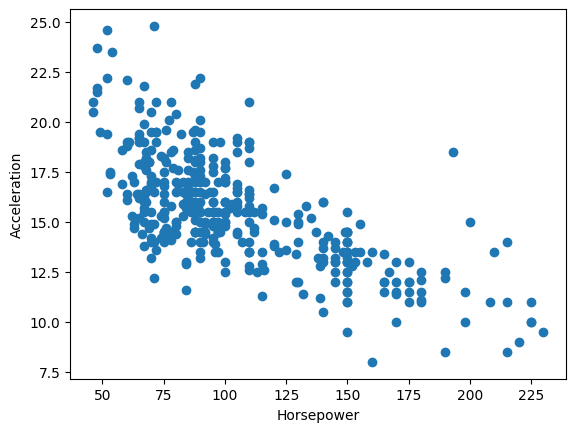

In [14]:
from scipy.stats import *

plt.scatter(df.horsepower, df.acceleration)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")

In [15]:
print("Pearson:",pearsonr(df.horsepower, df.acceleration))

Pearson: PearsonRResult(statistic=-0.6891955103342371, pvalue=1.5818862297811214e-56)


In [16]:
sample_car = df.sample(frac=0.3,replace=True)
sample_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
242,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i
315,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord
213,13.0,8,350.0,145.0,4055,12.0,76,usa,chevy c10
84,27.0,4,97.0,88.0,2100,16.5,72,japan,toyota corolla 1600 (sw)
358,31.6,4,120.0,74.0,2635,18.3,81,japan,mazda 626
...,...,...,...,...,...,...,...,...,...
212,16.5,8,350.0,180.0,4380,12.1,76,usa,cadillac seville
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
129,31.0,4,79.0,67.0,1950,19.0,74,japan,datsun b210
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe


In [17]:
print("Pearson:",pearsonr(sample_car.horsepower, sample_car.acceleration))

Pearson: PearsonRResult(statistic=-0.7267559606365753, pvalue=1.211975664343792e-20)


In [18]:
#Define a bootstrap function:
def bootstrap_pearson(sample_car):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_car.sample(len(sample), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.horsepower, subsample.acceleration)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI
    

In [19]:
bootstrap_pearson(sample_car)

[-0.8479620938524572, -0.5349805668623286]

In [20]:
print("95% confidence interval of the Pearson correlation coefficient is:",
     "[-0.86 to -0.29]")


95% confidence interval of the Pearson correlation coefficient is: [-0.86 to -0.29]


We are 95% confident that the true correlation of HP and ACC in the population is between -0.86 to -0.29.

In this case, the CI doesn't cover 0, which means population correlation coefficient is not zero. So the negative trend we observe from the sample isn't just becuase of the sampling variation but because the true correlation is negative in the population.